## Models exercises

### Exercise 1

Tasl: Use numpy and matplotlib to plot the absolute value function.

Research and explain why the absolute value function is not typically used in fitting straight lines to data.

***

The numpy library includes the *absolute()* function, which is used to find the absolute value of each element of a given array. The function takes an input array, an optional output location to store the result given as a multi-dimensional array or a tuple of the same, and an optional "where" parameter which sets the output array to a ufunc argument where a given condition is met.
Numpy.absolute() documentation: https://numpy.org/doc/stable/reference/generated/numpy.absolute.html

The absolute value function states that:

$f(x) = a|x - h| + k$

or most commonly used as:

$f(x) = |x|$

Where a = 1 and h = k = 0 and x is a real number. **a** represents how far the graph extends vertically, **h** represents the horizontal shift and **k** represents the vertical shift from the graph of f(x) = |x|. If the value of **a** is negative, the graph opens downwards and if it is positive, the graph opens upwards.

Because the absolute value function returns a positive integer regardless of the sign of its input integer, an array of numbers which have negative integers will yield a symmetrical V-shaped plot.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# increasing plot size
plt.rcParams['figure.figsize'] = (8, 6)

I will be replicating the data used in the article from which this information was sourced: [Absolute Value Function](https://www.cuemath.com/algebra/absolute-value-function/).

In [18]:
x = np.arange(-5,6)
x

array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5])

First is the straight line graph showing the raw values of the *x* array:

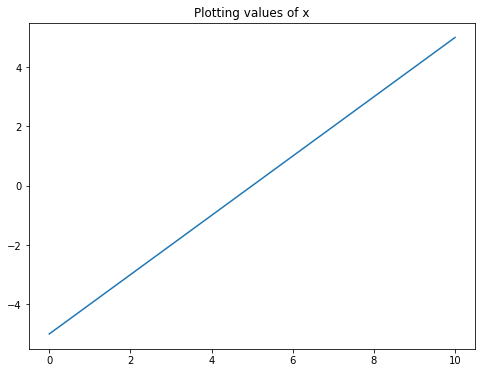

In [19]:
plt.plot(x)
plt.title("Plotting values of x")
plt.show()

Then the values are converted to their absolute values and plotted:

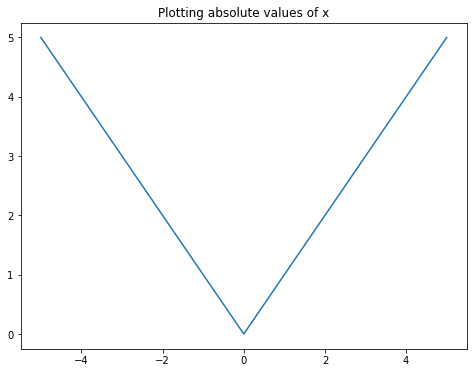

In [21]:
y = np.absolute(x)
plt.plot(x, y)
plt.title("Plotting absolute values of x")
plt.show()

The reason why it is not appropriate to use the absolute value function to fit straight lines is that straight lines are defined by linear functions, i.e., those with the form:

$f(x) = ax + b$

where ***a*** and ***b*** are real numbers. As shown in the below example [(source)](https://math.stackexchange.com/questions/88669/is-the-absolute-value-function-a-linear-function), the absolute value function does not satisfy those criteria:

$f(ax + y) = af(x) + f(y)$

$a = -1, x = 1, y = 0$

$|ax + y| = |-1| = 1$

$-1|1| + |0| = -1$

The two sides of the equation do not match, indicating that the absolute value function is not linear and cannot be used to describe linear datapoints.

***

### Exercise 2

Task: Fit a straight line to the following data points, using all three methods used above.

Do you think a straight line is a good model for these points?

x = [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0]

y = [0.7, 1.1, 1.5, 1.6, 1.7, 2.0, 2.3, 2.4, 2.2, 2.1, 2.4, 2.6, 2.2, 2.7, 2.5, 2.7, 2.8, 2.9, 3.1]

The three methods to be used are polyfit, minimisation and curve fitting.

Text(0, 0.5, 'Y')

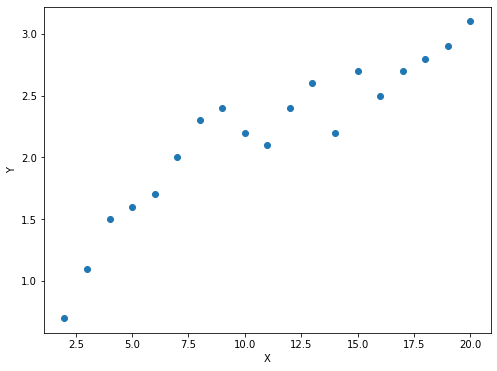

In [37]:
# defining the variables and generating the point graph
x = [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0]
y = [0.7, 1.1, 1.5, 1.6, 1.7, 2.0, 2.3, 2.4, 2.2, 2.1, 2.4, 2.6, 2.2, 2.7, 2.5, 2.7, 2.8, 2.9, 3.1]

x = np.asarray(x)
y = np.asarray(y)

plt.plot(x,y, 'o')
plt.xlabel('X')
plt.ylabel('Y')


### Polyfit

The values for the slope of the graph (m) and the y-intercept (c) must be defined. We can do this using numpy's **polyfit()** function:

In [44]:
np.polyfit(x,y,1)

array([0.10315789, 1.04947368])

The slope is 0.1 and the y-intercept is 1.05. The polyfit function automatically finds the line with the lowest cost (distance of each point from the line in absolute terms).

We then find the best fit line:

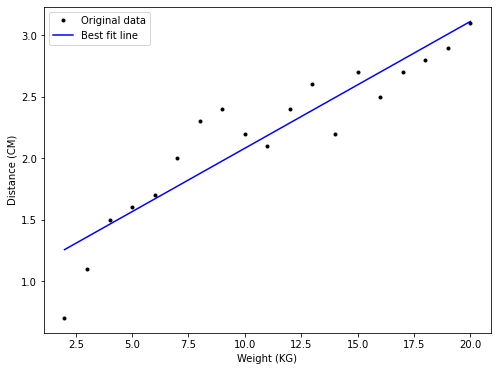

In [90]:
# plot the best fit line
plt.plot(x, y, 'k.', label='Original data')
plt.plot(x, m * x + c, 'b-', label='Best fit line')

# add axis labels and legend
plt.xlabel('Weight (KG)')
plt.ylabel('Distance (CM)')
plt.legend()

# show the plot
plt.show()

The following formula is used to calculate the cost of the line for the data.

In [43]:
cost = lambda m,c: np.sum([(y[i] - m * x[i] - c)**2 for i in range(x.size)])

print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (m, c, cost(m, c)))

Cost with m =  0.10 and c =  1.05:     1.04


### Optimize and minimize

The SciPy package contains several important algorithms for performing minimization. (Code adapted from lecture material)
We first defien a cost function which will be passed as an argument to the minimize function.

In [49]:
import scipy.optimize as so

In [50]:
def cost(MC):
    # separates the slope and y-intercept values
    m, c = MC
    # uses the x and y data to find cost
    cost = np.sum((y - m * x - c)**2)
    # returns that value
    return cost

In [52]:
cost((0.10315789, 1.04947368))

1.039578947368494

We next use the scipy.optimize.minimize() function to return an OptimizeResult object which gives the solution array (x) containing the slope and y-intercept of the optimized line.

In [56]:
result = so.minimize(cost, (2.0, 2.0))
result

      fun: 1.0395789473691037
 hess_inv: array([[ 0.00087719, -0.00964912],
       [-0.00964912,  0.13245614]])
      jac: array([2.98023224e-08, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([0.10315786, 1.04947406])

In [57]:
# extract and print the optimized m and c
m_o, c_o = result.x

m_o, c_o

(0.10315786014998399, 1.04947405671058)

In [58]:
# print analytical result
m_a, c_a = np.polyfit(x, y, 1)

m_a, c_a

(0.10315789473684209, 1.0494736842105263)

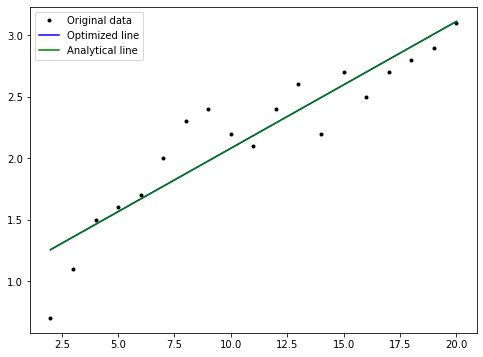

In [60]:
# plots the best fit line from the optimization
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, 'k.', label='Original data')
ax.plot(x, m_o * x + c_o, 'b-', label='Optimized line')
ax.plot(x, m_a * x + c_a, 'g-', label='Analytical line')
ax.legend()

plt.show()

### Curve fitting

Curve fitting uses a curved instead of stright line to account for datapoints which diverge significantly from the best-fit line. We first define a test function which is then passed to the curve_fit() function.

In [84]:
from scipy.optimize import curve_fit
x = [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0]
y = [0.7, 1.1, 1.5, 1.6, 1.7, 2.0, 2.3, 2.4, 2.2, 2.1, 2.4, 2.6, 2.2, 2.7, 2.5, 2.7, 2.8, 2.9, 3.1]
x = np.asarray(x)
y = np.asarray(y)

In [85]:
def f(x, m, c):
    return m * x + c

In [86]:
result = so.curve_fit(f, x, y)
result

(array([0.10315789, 1.04947369]),
 array([[ 0.00010728, -0.00118012],
        [-0.00118012,  0.01619984]]))

These figures are the slope and intercept of the new curve-fitted line, and the coefficients of the new parameters.

In [87]:
# Pull out the parameters.
m_f, c_f = result[0]
# Print values.
m_f, c_f

(0.10315789458399933, 1.0494736859688867)

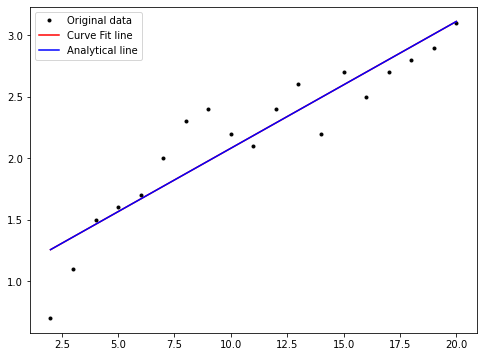

In [89]:
# Plot the best fit line from the optimization.
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, 'k.', label='Original data')
ax.plot(x, m_f * x + c_f, 'r-', label='Curve Fit line')
ax.plot(x, m_a * x + c_a, 'b-', label='Analytical line')
ax.legend()

# Show the plot.
plt.show()

As can be seen in the above plot, the curve fit and analytical lines overlap completely. The consistency of results obtained from each of the three methods indicates that the straight line is a good model for this dataset.

***

### References

Numpy absolute documentation: https://numpy.org/doc/stable/reference/generated/numpy.absolute.html

Absolute value function definition: https://www.cuemath.com/algebra/absolute-value-function/

Why the absolute value function is not used for straight lines: https://math.stackexchange.com/questions/88669/is-the-absolute-value-function-a-linear-function